# CHARACTER RECOGNITION#
 ### The aim of this project is to create online character recognition system. As new english learners or childrens who are in school and trying to write alphabate from A-Z  everytime techers may not available. By considering this into mind I am trying to create system that checks  whether the alphabets is  correct or wrong , so here I am creating online character recognition system. The database is created by using Canvas program which was written in HTML+Javascript language. The database contain 159 images of A-Z character. ###


#     Creating own database using Canvas. HTML + Javascript code of Canvas program is here:
        
##

In [ ]:
<html>
<head>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.4.1/jquery.min.js"></script>
<script src="http://cdn.jsdelivr.net/g/filesaver.js"></script>
</head>
<body>

<center>
<button type="button" onclick="save()">Save</button>
<input type="button" value="clear" id="clr" size="23" onclick="erase()" style="position:absolute">Clear</input>
 
<!--drop down box for selected colors.-->
<p>
    <label>Color: <select id="selectedColor">
            <option value="Red">Red</option>
			<option value="Black">Balck</option>
            <option value="Blue">Blue</option>
            <option value="Green">Green</option>
			<option value="Aqua ">Aqua </option>
			<option value="Brown">Brown</option>
			<option value="Chartreuse "> Chartreuse </option>
			<option value="Cyan ">Cyan </option>
			<option value="Gray">Gray</option>
			<option value="DarkMagenta ">DarkMagenta </option>
			<option value="DarkOrange " >DarkOrange </option>
			<option value="DarkSalmon " >DarkSalmon </option>
			<option value="DarkViolet  " >DarkViolet  </option>
			<option value="Indigo" >Indigo   </option>
			<option value="LawnGreen  " >LawnGreen  </option>
			<option value="LightCoral  " >LightCoral  </option>
			<option value="Yellow" >Yellow </option>
			<option value="Orchid">Orchid </option>
			<option value="SandyBrown"> SandyBrown </option>
    </select></label>
</p>
<!--drop down box for selected drawing tools-->
<p>
    <label>Stitching Tool: <select id="selectedTool">
            <option value="crayon">crayon</option>
            <option value="pencil">Pencil</option>
           
    </select></label>
</p>

<div style="background-color: #c1f0c1;width:500px;height:500px">
<canvas id="canvas" width="500" height="500"></canvas>
</div>
</center>
<script>
context = document.getElementById('canvas').getContext("2d");
canvas = document.getElementById('canvas');
        w = canvas.width;
        h = canvas.height; 
		
$('#canvas').mousedown(function(e){
  var mouseX = e.pageX - this.offsetLeft;
  var mouseY = e.pageY - this.offsetTop;
  var colorvar="Black";	
	var tool="pencil";
  paint = true;
  addClick(e.pageX - this.offsetLeft, e.pageY - this.offsetTop);
  redraw();
});
$('#canvas').mousemove(function(e){
  if(paint){
    addClick(e.pageX - this.offsetLeft, e.pageY - this.offsetTop, true);
	addcolor();
    redraw();
  }
});
$('#canvas').mouseup(function(e){
  paint = false;
});
$('#canvas').mouseleave(function(e){
  paint = false;
});
var clickX = new Array();
var clickY = new Array();
var clickDrag = new Array();
var paint;
function addClick(x, y, dragging)
{
  clickX.push(x);
  clickY.push(y);
  clickDrag.push(dragging);
}
function redraw(){
  context.clearRect(0, 0, context.canvas.width, context.canvas.height); // Clears the canvas
  
  addcolor()
  <!-- context.strokeStyle = "#df4b26";-->
  context.lineJoin = "round";
  context.lineWidth = 5;
			
  for(var i=0; i < clickX.length; i++) {		
    context.beginPath();
    if(clickDrag[i] && i){
      context.moveTo(clickX[i-1], clickY[i-1]);
     }else{
       context.moveTo(clickX[i]-1, clickY[i]);
     }
     context.lineTo(clickX[i], clickY[i]);
	 context.closePath();
     context.stroke();
  }
}
function addcolor() {
	var colorobj = document.getElementById('selectedColor').value;
        switch (colorobj) {
            case "Green":
                colorvar = "Green";
                break;
            case "Blue":
                colorvar = "Blue";
                break;
            case "Red":
                colorvar = "Red";
                break;
            case "Yellow":
                colorvar = "Yellow";
                break;
                    
            case "Aqua":
                colorvar = "Aqua";
                break;
			case "Brown":
                colorvar = "Brown";
                break;
			
			case "Cyan ":
                colorvar= "Cyan ";
                break;
			case "Gray":
                colorvar= "Gray";
                break;
						
			case "DarkViolet  ":
                colorvar= "DarkViolet  ";
                break;
			
			case "LawnGreen  ":
                colorvar = "LawnGreen  ";
                break;
			case "LightCoral  ":
                colorvar = "LightCoral  ";
                break;
			case "Yellow ":
                colorvar= "Yellow ";
                break;
			
        }
		context.strokeStyle = colorvar;
            
    }



function save() {
  var canvas = document.getElementById("canvas");
  var data = canvas.toDataURL();
   console.log(data);
   
   console.log("shitaal");
  <!--  var blob = new Blob([data],{type:"image/png", encoding: 'utf-8'});-->
    <!-- saveAs(blob,"m.png"); -->
	
}

function erase(){

   context.clearRect(0, 0, context.canvas.width, context.canvas.height);
  
  
}
</script>
</body>
</html>

# Importing  labraries#

In [15]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [16]:
tf.compat.v1.enable_eager_execution()

# Importing created image database for next processing from github    #

In [17]:
!wget -O imagedata.csv https://raw.githubusercontent.com/shitalajagekar/DataScience/master/imagedata.csv

--2020-04-26 13:10:08--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/imagedata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1776 (1.7K) [text/plain]
Saving to: ‘imagedata.csv’

100%[======================================>] 1,776       --.-K/s   in 0s      

2020-04-26 13:10:08 (16.7 MB/s) - ‘imagedata.csv’ saved [1776/1776]



In [18]:
!wget -O images.zip https://raw.githubusercontent.com/shitalajagekar/DataScience/master/images.zip

--2020-04-26 13:10:10--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1828109 (1.7M) [application/zip]
Saving to: ‘images.zip’

100%[======================================>] 1,828,109   --.-K/s   in 0.06s   

2020-04-26 13:10:10 (29.5 MB/s) - ‘images.zip’ saved [1828109/1828109]



In [19]:
from zipfile import ZipFile
'''
    extracting the image zip file
'''
image = ZipFile('images.zip')
image.extractall('images')


In [20]:
!ls 
'''
checking available list of files
    '''

imagedata.csv  images  images.zip


'\nchecking available list of files\n    '

In [21]:
import pandas as pd
'''
    storing the image data into dataframe df
'''
df=pd.read_csv("imagedata.csv")



In [22]:
df.head()

,label,path
0,0,a1.jpg
1,0,a2.jpg
2,0,a3.jpg
3,0,a4.jpg
4,0,a5.jpg


In [23]:

df[df.path != 'a7.jpg']

,label,path
0,0,a1.jpg
1,0,a2.jpg
2,0,a3.jpg
3,0,a4.jpg
4,0,a5.jpg
5,0,a6.jpg
7,1,b1.jpg
8,1,b2.jpg
9,1,b3.jpg
10,1,b4.jpg


In [24]:
ind=[]
id=0
for i in df['label']:
    ind.append(id)
    id=id+1
    
df['Index']=ind

In [40]:
df.head(50)

,label,path,Index
0,0,a1.jpg,0
1,0,a2.jpg,1
2,0,a3.jpg,2
3,0,a4.jpg,3
4,0,a5.jpg,4
5,0,a6.jpg,5
6,0,a7.jpg,6
7,1,b1.jpg,7
8,1,b2.jpg,8
9,1,b3.jpg,9


In [26]:
import os
os.listdir("images/images")

['w3.jpg',
 'c8.jpg',
 'b5.jpg',
 'j2.jpg',
 'y3.jpg',
 'j1.jpg',
 'v4.jpg',
 'w4.jpg',
 'c4.jpg',
 'v1.jpg',
 'l5.jpg',
 'n1.jpg',
 'a5.jpg',
 'h6.jpg',
 'w6.jpg',
 'u2.jpg',
 'm2.jpg',
 'a2.jpg',
 'c3.jpg',
 'i5.jpg',
 'h4.jpg',
 'q2.jpg',
 'i3.jpg',
 's3.jpg',
 'b3.jpg',
 'l6.jpg',
 'l2.jpg',
 'b2.jpg',
 'o4.jpg',
 'g5.jpg',
 's5.jpg',
 'f4.jpg',
 'g2.jpg',
 'j3.jpg',
 'i2.jpg',
 'b6.jpg',
 'k5.jpg',
 'h5.jpg',
 'c6.jpg',
 'g4.jpg',
 'z3.jpg',
 'w2.jpg',
 'j6.jpg',
 'm6.jpg',
 'l4.jpg',
 'u1.jpg',
 't5.jpg',
 'r7.jpg',
 'j7.jpg',
 'z2.jpg',
 's2.jpg',
 'j8.jpg',
 'p1.jpg',
 'i7.jpg',
 'o7.jpg',
 'r1.jpg',
 'e1.jpg',
 'h1.jpg',
 'e5.jpg',
 's6.jpg',
 'd4.jpg',
 'u3.jpg',
 'z4.jpg',
 'n5.jpg',
 'o2.jpg',
 'n2.jpg',
 'n7.jpg',
 'x3.jpg',
 'f6.jpg',
 'q4.jpg',
 'l7.jpg',
 'h3.jpg',
 'g7.jpg',
 'v3.jpg',
 'a4.jpg',
 'y1.jpg',
 'm3.jpg',
 't6.jpg',
 'w1.jpg',
 'r3.jpg',
 'f3.jpg',
 'i6.jpg',
 'p3.jpg',
 't1.jpg',
 'u4.jpg',
 'f8.jpg',
 'c1.jpg',
 'p6.jpg',
 'd3.jpg',
 'e3.jpg',
 'o6.jpg',

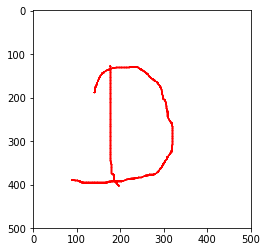

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
'''
    checking image data.
'''
img = mpimg.imread('images/images/d1.jpg')

plt.imshow(img, cmap='gray')

In [28]:

image_path = df["path"].tolist()

# Creating the model for project #

### importing required file to create the machine learing model ###

In [29]:
from tensorflow.keras.preprocessing import image as tf_img

### Traing and testing the data ###

In [30]:
train_image = []
for image_name in image_path:
    img = tf_img.load_img('images/images/'+image_name, target_size=(28,28,1), grayscale=True)
    img = tf_img.img_to_array(img)
    img = img/255 # Normalization
    train_image.append(img)
X = np.array(train_image)

/opt/conda/envs/Python36/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [47]:
y = df['label'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [49]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

In [50]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 133 samples, validate on 34 samples
Epoch 1/10
133/133 [==============================] - 4s 30ms/sample - loss: 3.2557 - acc: 0.0602 - val_loss: 3.2504 - val_acc: 0.0000e+00
Epoch 2/10
133/133 [==============================] - 1s 10ms/sample - loss: 3.2139 - acc: 0.0977 - val_loss: 3.2429 - val_acc: 0.0294
Epoch 3/10
133/133 [==============================] - 2s 12ms/sample - loss: 3.1190 - acc: 0.2331 - val_loss: 3.2503 - val_acc: 0.0294
Epoch 4/10
133/133 [==============================] - 1s 11ms/sample - loss: 2.9910 - acc: 0.2180 - val_loss: 3.2692 - val_acc: 0.0294
Epoch 5/10
133/133 [==============================] - 1s 10ms/sample - loss: 2.8974 - acc: 0.1955 - val_loss: 3.2041 - val_acc: 0.0294
Epoch 6/10
133/133 [==============================] - 2s 12ms/sample - loss: 2.6930 - acc: 0.2707 - val_loss: 3.2257 - val_acc: 0.0294
Epoch 7/10
133/133 [==============================] - 1s 10ms/sample - loss: 2.5505 - acc: 0.2857 - val_loss: 3.3005 - val_acc: 0.0882
Epoch 

3


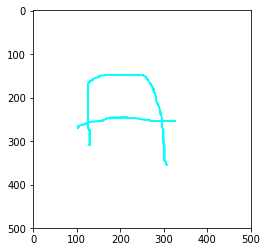

In [39]:
img2 = tf_img.load_img('images/images/'+"d7.jpg", target_size=(28,28,1), grayscale=True)
img2 = tf_img.img_to_array(img2)
img2 = img2/255
data=model.predict_classes([[img2]])

for i in df['Index']:
    if data[0]== i:
        path=df.iloc[i,1]
        img = mpimg.imread('images/images/'+path)
        plt.imshow(img, cmap='gray')
        
print(data[0])


In [52]:
img2 = tf_img.load_img('images/images/'+"d7.jpg", target_size=(28,28,1), grayscale=True)
img2 = tf_img.img_to_array(img2)
img2 = img2/255
print(model.predict_classes([[img2]]))


[1]


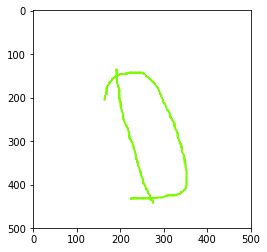

In [53]:
img = mpimg.imread('images/images/d7.jpg')

plt.imshow(img, cmap='gray')